(fin-edu:principles:essentials)=
# Il minimo indispensabile

Questa pagina viene scritta in lingua italiana, per alcuni semplici motivi: l'Italia ha la popolazione con il minor tasso di alfabetizzazione finanziaria tra i paesi OCSE[^ocse-italy], e il grado di alfabetizzazione finanziaria è legato al livello di istruzione (con correlazione positiva: in media, meno hai studiato, meno sai rispondere a domande su concetti base come inflazione, interesse composto, diversificazione del rischio, e più alta è la probabilità che tu faccia vaccate).

[^ocse-italy]: [Paola Tamma, Why Europeans need to learn more about money, FT](https://www.ft.com/content/066c0c98-ec47-4b51-9416-b2b2661ec942), e riferimenti contenuti; [Mario Seminerio, tweet 2025.12.12](https://x.com/Phastidio/status/1999376969369010468?s=20); OECD 2022 survey.


Prima di affrontare argomenti più complessi, è quindi meglio stabilire una linea di galleggiamento e fissare un minimo di decenza e igiene dal quale partire.

**Necessità dell'investimento.**
- Si vive con il valore reale dei soldi, non con quello reale
- Nel sistema attuale, gli obiettivi di inflazione sono attorno al $2-3\%$[^inflation-target]
- L'inflazione erode il valore reale dei soldi
- Questo rende necessario cercare dei modi per difendere il valore del risparmio/patrimonio, attraverso investimento.

[^inflation-target]: Sono numeri arbitrari? Più o meno sì. Il fatto fondamentale per chi fa scelte economiche è che siano numeri affidabili per fare le previsioni.

**Come investire: i princìpi**
- Rendimento, rischio, R/R: composizione rendimenti, ruolo dell'incertezza (e della volatilità), minimizzazione costi certi (a parità di altre condizioni)
- Diversificazione
- Strumenti per investire

**Come investire: costruzione di un portafogli, e gestione nel tempo.**
Una volta definiti gli obiettivi personali, compatibilmente con la propria tolleranza a rischi e volatilità:
- Costruzione portafogli con strumenti finanziari, secondo i princìpi di investimento
- Gestione su un orizzonte temporale medio-lungo (**ribilanciamento**


(fin-edu:principles:essentials:inflation)=
## Inflazione

Breve nota sull'[inflazione italiana negli ultimi anni](fin-edu:inflation). Se necessario, usate il traduttore automatico del browser.

(fin-edu:principles:essentials:compounding)=
## Composizione dei rendimenti/dell'interesse



(fin-edu:principles:essentials:compounding:volatility)=
### Rendimenti costanti

```{admonition} Composizione del rendimento: "se migliori l'$1\%$ ogni giorno, alla fine dell'anno sei un supereroe"
:class: tip

- Il rendimento (o l'interesse, con reinvestimento se necessario) di un investimento su più intervalli temporale si compone con il prodotto. Una piccola differenza di rendimento sul singolo intervallo può avere effetti enormi su orizzonti temporali sufficientemente lunghi.

- Su orizzonti temporali lunghi, è misura minima di decenza e igiene usare la **scala logaritmica** nei grafici.

```


Final value after 30 periods:
1-period yield:  0.05; wealth:  4.322
1-period yield:  0.08; wealth: 10.063

Final value after 60 periods:
1-period yield:  0.05; wealth: 18.679
1-period yield:  0.08; wealth: 101.257


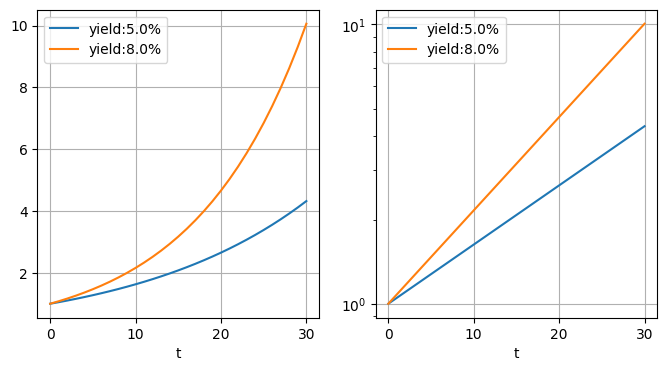

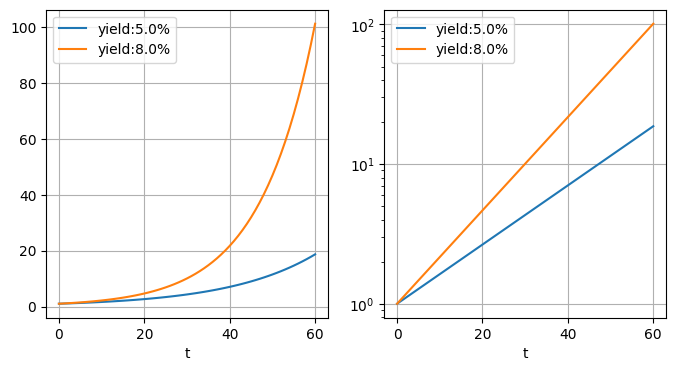

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

yield_1 = .05
yield_2 = .08

ni_v = [ 30, 60 ]

for ni in ni_v:
    iv = np.arange(ni+1)
    
    w1 = (1 + yield_1)**iv
    w2 = (1 + yield_2)**iv
    
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    ax[0].plot(iv, w1, label=f"yield:{yield_1*100}%")
    ax[0].plot(iv, w2, label=f"yield:{yield_2*100}%")
    
    ax[1].semilogy(iv, w1, label=f"yield:{yield_1*100}%")
    ax[1].semilogy(iv, w2, label=f"yield:{yield_2*100}%")
    
    ax[0].grid(); ax[0].set_xlabel('t'); ax[0].legend()
    ax[1].grid(); ax[1].set_xlabel('t'); ax[1].legend()
    
    print(f"\nFinal value after {ni} periods:")
    print(f"1-period yield: {yield_1:5.2f}; wealth: {w1[-1]:6.3f}")
    print(f"1-period yield: {yield_2:5.2f}; wealth: {w2[-1]:6.3f}")


(fin-edu:principles:essentials:compounding:volatility)=
### Rendimenti non costanti - volatilità

- Concetti di base su composizione di rendimenti non costanti
- Volatility drag: la volatilità riduce il rendimento composto atteso

```{admonition} Se perdi il $33.33\%$, successivamente devi guadagnare il $50\%$ per tornare in pari
:class: tip

- Se perdi il $33.33\%$, successivamente devi guadagnare il $50\%$ per tornare in pari. 
- Se perdi il $50\%$, successivamente devi guadagnare il $100\%$
- Se perdi il $50\%$ prima e guadagni il $100\%$ poi o se guadagni il $100\%$ prima e perdi il $50\%$ poi, alla fine il risultato è lo stesso
- ...

```

```{admonition} Volatility-drag (I)
:class: tip

Una successione di eventi che comportano la perdita o il guadagno del $30\%$, nel tempo portano il patrimonio atteso a zero. Se la possibile perdita è del $50\%$, il patrimonio atteso tende a zero più velocemente.

```

In [2]:
import numpy as np
import matplotlib.pyplot as plt

nt = 30
nreals = 1000

gain_1, loss_1 = .2 , -.1
gain_2, loss_2 = .5 , -.5
p_win_1 = .5;  p_loss_1 = 1. - p_win_1
p_win_2 = .5;  p_loss_2 = 1. - p_win_2


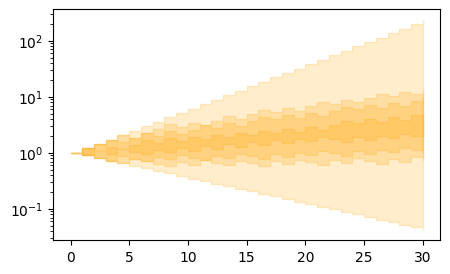

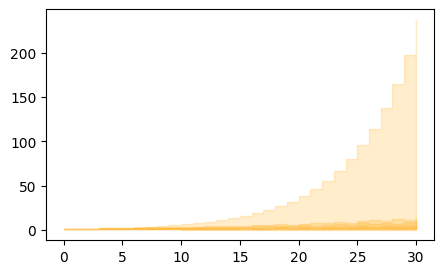

In [3]:
#> Method 1. Succcessive independent Bernoulli = binomial distribution
from scipy.stats import binom

percs = np.array([.0, 1./30., .1, 1./3., .5, 2./3., .9, 1.-1./30., 1.])
n_percs = len(percs)
perc_pairs = [ [ i, n_percs-1-i ] for i in np.arange(int(np.floor((n_percs-1)/2))) ]

l1, b1 = binom.support(nt, p_win_1)
x = np.arange(l1,b1+1)
p = binom.cdf(x, nt, p_win_1)
y = ( 1. + gain_1 )**x * ( 1 + loss_1 )**(nt-x)

tv = np.arange(0,nt+1)
y_percs_m = []

for it in tv:
    #> Support, domain, and cdf of the Bernoulli distribution
    l1, u1 = binom.support(it, p_win_1)                # lower, upper bound
    x = np.arange(l1, u1+1)                            # domain
    p = binom.cdf(x, it, p_win_1)                      # cumulative prob
    y_1 = ( 1. + gain_1 )**x * ( 1 + loss_1 )**(u1-x)  # outcomes
  
    #>
    idx = np.searchsorted(p, percs, side='left')
    y_percs = y_1[idx]
        
    y_percs_m += [ y_percs ]

y_percs_m = np.array(y_percs_m)

fig, ax = plt.subplots(1,1, figsize=(5,3))
# ax.step(tv, y_percs_m, where='post', color='black', lw=.5)
for perc_pair in perc_pairs:
    ax.fill_between(tv, y_percs_m[:,perc_pair[0]], y_percs_m[:,perc_pair[1]], step='post', alpha=.2, color='orange')
    
ax.set_yscale('log')

fig, ax = plt.subplots(1,1, figsize=(5,3))
# ax.step(tv, y_percs_m, where='post', color='black', lw=.5)
for perc_pair in perc_pairs:
    ax.fill_between(tv, y_percs_m[:,perc_pair[0]], y_percs_m[:,perc_pair[1]], step='post', alpha=.2, color='orange')
    
      




In [4]:
#> Method 2. Realizations of the stochastic processes
rng = np.random.default_rng().choice
rng_params_1 = { 'a': [gain_1, loss_1], 'p': [p_win_1, p_loss_1], 'size': nt }
rng_params_2 = { 'a': [gain_2, loss_2], 'p': [p_win_2, p_loss_2], 'size': nt }

w1, w2 = [], []

for ireal in np.arange(nreals):

    w1 += [ np.array([ 1. ] + list(np.cumprod(1+rng(**rng_params_1)))) ]
    w2 += [ np.array([ 1. ] + list(np.cumprod(1+rng(**rng_params_2)))) ]

w1 = np.array(w1).T
w2 = np.array(w2).T

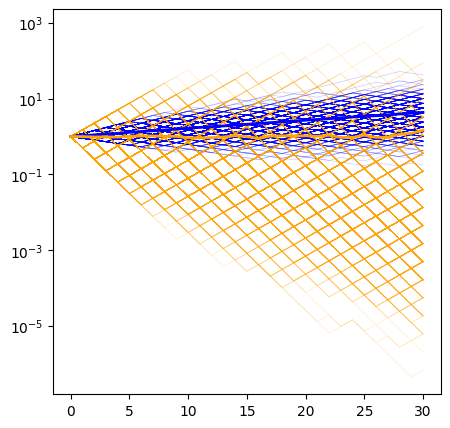

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_yscale = 'log'

if plot_yscale == 'log':
    ax.semilogy(w1, lw=.5, color='blue'  , alpha=.2)
    ax.semilogy(w2, lw=.5, color='orange', alpha=.2)
    ax.semilogy(np.mean(w1, axis=1), lw=2., color='blue')
    ax.semilogy(np.mean(w2, axis=1), lw=2., color='orange')
else:
    ax.plot(w1, lw=.5, color='blue'  , alpha=.1)
    ax.plot(w2, lw=.5, color='orange', alpha=.1)
    ax.plot(np.mean(w1, axis=1), lw=2., color='blue')
    ax.plot(np.mean(w2, axis=1), lw=2., color='orange')

plt.show()


```{admonition} Volatility-drag (II)
:class: tip

A pari ritorno atteso di due investimenti, l'investimento con minore dispersione ha un rendimento composto maggiore.

Come discusso in dettaglio [più avanti](fin-edu:principles:time:volatility-drag), il rendimento composto di un un'investimento con rendimento atteso $\mu$ e deviazione standard dei rendimenti $\sigma$ vale $\mu - \frac{\sigma^2}{2}$.

```

```{admonition} La composizione di rendimenti simmetrici è asimmetrica
:class: tip

La composizione del rendimento di eventi simmetrici sul singolo intervallo temporale (es. probabilità uguale di guadagno o perdita di uno stessa quantità) porta a un rendimento asimmetrico, *con skewness*, di solito con valore mediano inferiore al valore medio: tipicamente, il valore medio risulta superiore al valore mediano a causa di eventi estremamente positivi ma estremamente rari.


```

(fin-edu:principles:essentials:diversification)=
## Diversificazione



```{admonition} "Non mettere tutte le tue uova nello stesso paniere"
:class: tip

Citazione?

```